In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [435]:
sns.set(context='notebook', 
            style='darkgrid', 
            palette='deep', 
            font='sans-serif', 
            font_scale=1, 
            color_codes=True, 
            rc=None)
sns.set_style({'font.sans-serif':['SimHei','Arial']})

In [114]:
raw_data = pd.read_excel("wind_sip.xlsx")
raw_data = raw_data[raw_data['名称'].notna()]
# raw_data.dropna(inplace=True)

In [115]:
raw_data.columns

Index(['序号', '代码', '名称', '最新公告日期', '预案公告日', '方案进度', '激励标的物', '激励方式',
       '激励总数(万股/万份)', '激励总数占当时总股本比例(%)', '期权初始行权价格(股票转让价格)', '有效期(年)',
       '锁定期(年)', '解锁期(年)', '股东大会公告日', '首次实施公告日', '到期日', '方案说明', '价格说明',
       '激励股票出售说明', '激励授予条件', '行权特别条件', '解锁方式', '证监会行业', 'Wind行业'],
      dtype='object')

In [116]:
raw_data['方案进度'].unique()

array(['实施', '停止实施', '股东大会通过', '董事会预案', '国资委批准', '股东大会未通过'], dtype=object)

In [119]:
raw_data['激励标的物'].unique()

array(['期权', '第一类限制性股票', '股票增值权', '第二类限制性股票'], dtype=object)

In [180]:
raw_data['板块'] = np.nan
raw_data.loc[raw_data['代码'].str[0:3].isin(['688','689']), '板块']='科创板'
raw_data.loc[raw_data['代码'].str[0:2]=='30', '板块']='创业板'
raw_data.loc[raw_data['代码'].str[0:3].isin(['600', '601', '603', '605', '000','001']), '板块']='主板'
raw_data.loc[raw_data['代码'].str[0:3].isin(['002','003']), '板块']='中小板'
raw_data.loc[raw_data['代码'].str[0:3]=='430', '板块']='新三板'
raw_data.loc[raw_data['代码'].str[0]=='8', '板块']='北证'
raw_data['year'] = raw_data['预案公告日'].year


In [184]:
data=raw_data[raw_data['预案公告日']>='2010-01-01']
data['预案公告日']= pd.to_datetime(data['预案公告日'])
data['最新公告日期'] = pd.to_datetime(data['最新公告日期'])

data.sort_values('预案公告日', ascending=True, inplace=True)
data.head()

,序号,代码,名称,最新公告日期,预案公告日,方案进度,激励标的物,激励方式,激励总数(万股/万份),激励总数占当时总股本比例(%),...,到期日,方案说明,价格说明,激励股票出售说明,激励授予条件,行权特别条件,解锁方式,证监会行业,Wind行业,板块
3389,3390.0,600383.SH,金地集团,2010-03-20,2010-01-15,实施,期权,"授予期权,行权股票来源为上市公司定向发行股票",9937.0000,4.0000,...,2017-03-19,本计划下授予的每份股票期权拥有在行权有效期内，在满足生效条件和生效安排情况下，以行权价格购买...,14.12,股票期权属于激励对象本人（激励对象死亡时，由其法定继承人继承），不可出售、转让、担保、押记、...,公司和激励对象满足以下条件时，公司方可依据本计划向激励对象进行股票期权授予：_x000d_\...,（一）股票期权生效前一个财务年度公司业绩达到以下条件：_x000d_\n（1）扣除非经常性损...,NaN,房地产业,房地产Ⅱ,主板
307,308.0,002011.SZ,盾安环境,2010-08-17,2010-01-19,实施,期权,"授予期权,行权股票来源为上市公司定向发行股票",1450.0000,3.8900,...,2015-08-13,本激励计划中，盾安环境授予激励对象总计1450万份股票期权，股票来源为盾安环境向激励对象定向...,18.65,1、激励对象出售其行权后持有盾安环境股票，应当符合《公司法》、《证券法》及其他法律、法规和规...,1、在授权前，公司应未发生如下任一情形：_x000d_\n（1）最近一个会计年度的财务会计报...,第一个行权期行权条件为：2009年度至N年度，归属于公司股东的扣除非经常损益后净利润年复合增...,NaN,通用设备制造业,资本货物,中小板
461,462.0,002138.SZ,顺络电子,2010-04-01,2010-01-20,实施,第一类限制性股票,上市公司定向发行股票,735.1500,6.0159,...,2015-03-17,本股权激励计划所采用的激励形式为限制性股票。本股权激励计划所涉及的标的股票不超过569万股顺...,2009年度分红调整为3.19元/股.,本《激励计划》对激励对象出售其持有的顺络电子股票的规定为：（1）激励对象转让其持有的顺络电子...,"1,顺络电子未发生如下任一情形:(1)最近一个会计年度的财务会计报告被注册会计师出具否定意见...",第一次解锁:2010年度加权平均净资产收益率不低于10%； 以2009年度净利润为基数，20...,NaN,计算机、通信和其他电子设备制造业,技术硬件与设备,中小板
104,105.0,000568.SZ,泸州老窖,2010-02-11,2010-01-23,实施,期权,"授予期权,行权股票来源为上市公司定向发行股票",1344.0000,0.9600,...,2015-02-10,"泸州老窖授予激励对象1,344万份股票期权，每份股票期权拥有在可行权日以行权价格和行权条件购...",12.78,禁售期是指对激励对象行权后所获股票进行售出限制的时间段。本次股票期权激励计划的禁售规定按照《...,1、公司未发生如下任一情形：_x000d_\n（1）最近一个会计年度财务会计报告被注册会计师...,本计划在2011——2013年的3个会计年度中，分年度进行绩效考核，每个会计年度考核一次，以...,NaN,酒、饮料和精制茶制造业,食品、饮料与烟草,主板
479,480.0,002153.SZ,石基信息,2014-03-11,2010-01-23,停止实施,期权,"授予期权,行权股票来源为上市公司定向发行股票",143.4786,1.2875,...,2014-02-12,公司拟授予股票期权激励对象288.4 万份股票期权，每份股票期权拥有在股票期权激励计划有效期...,分红由45元调整为44.7元,1、激励对象转让其持有公司的股票，应当符合《公司法》、《证券法》、《深圳证券交易所股票上市规...,"1,公司未发生如下任一情形:(1)最近一个会计年度的财务会计报告被注册会计师出具否定意见或者...",行权的公司业绩考核条件为：（1）以2008 年为基数，T 年度（授予日所在年度）、T+1 年...,NaN,软件和信息技术服务业,软件与服务,中小板


In [325]:
data['year'] = data['预案公告日'].dt.year

In [480]:
data['预案公告日'].max()

Timestamp('2023-02-28 00:00:00')

 ## 实施占比情况

In [474]:
class Description:
    def __init__(self, data_=data):
        self.data=data_
    def execution(self):
        self.completed_ratio = len(self.data[self.data['方案进度'].isin(
            ['实施', '董事会预案', '股东大会通过', '国资委批准'])])/len(self.data)
        plt.pie([self.completed_ratio, 1-self.completed_ratio], labels=['实施', '未实施'],
               autopct='%.1f%%')
        plt.title('股权激励实施情况')
        plt.show()
    def underlying(self):
        plt.pie(self.data['激励标的物'].value_counts().values, labels=self.data['激励标的物'].value_counts().index
                ,autopct="%.1f%%")
        plt.title("激励标的物")
        plt.show()
    def annual(self):
        self.annual_stats = pd.DataFrame(index=np.arange(2010,2024), columns=['all', 'done','ratio'])
        self.annual_stats['all'] = self.data.groupby(['year'])['序号'].agg('count')
        self.annual_stats['done'] = self.data[data['方案进度'].isin(
            ['实施', '董事会预案', '股东大会通过', '国资委批准'])].groupby(['year'])['序号'].agg('count')
        self.annual_stats['ratio'] = self.annual_stats['done']/self.annual_stats['all']
        
        x = np.arange(0,len(self.annual_stats['all'])*2,2)
        width=0.5
        x1 = x-width/2
        x2 = x+width/2
        y1 = self.annual_stats['all']
        y2 = self.annual_stats['done']

        # 绘制分组柱状图

        plt.bar(x1,y1,width=0.5,label='全部',color='#f9766e',edgecolor='k',zorder=2)
        plt.bar(x2,y2,width=0.5,label='实施',color='#00bfc4',edgecolor='k',zorder=2)

        # 添加x,y轴名称、图例和网格线
        plt.xlabel('年份',fontsize=11)
        plt.ylabel('数量',fontsize=11)
        plt.legend(frameon=False)
        plt.grid(ls='--',alpha=0.8)

        # 修改x刻度标签为对应日期
        plt.xticks(x,self.annual_stats.index,fontsize=10)
        plt.tick_params(axis='x',length=0)

        plt.tight_layout()
#         plt.savefig('bar2.png',dpi=600)
        plt.show()
        
        self.annual_stats.ratio.plot()
        plt.title('股权激励实施率')
        plt.legend(['实施率'])
        plt.show()
        

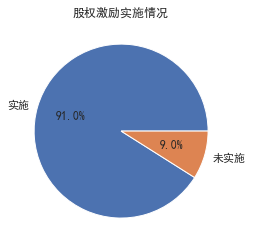

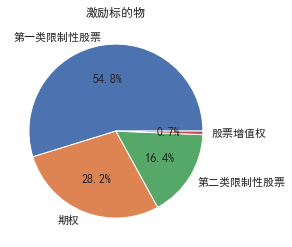

In [475]:
des_all = Description()
des_all.execution()
des_all.underlying()

## 实施情况分年表现

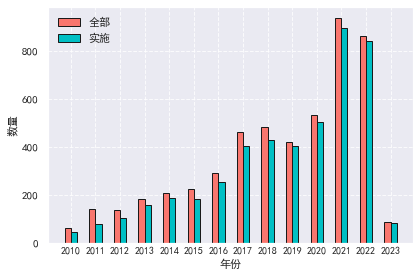

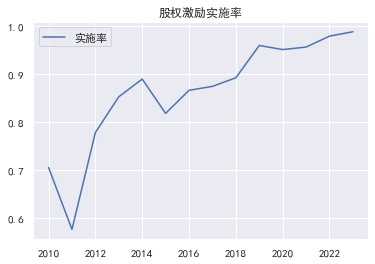

In [476]:
des_all.annual()

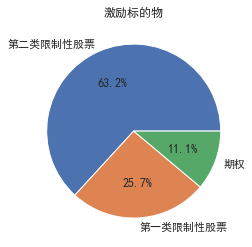

In [472]:
## 20210101-20220815
cyb21 = Description(data_=data[(data['预案公告日']>='20210101')&( data['预案公告日']<'20220815')
                               &(data['板块']=='创业板')])
# des22.execution()
cyb21.underlying()

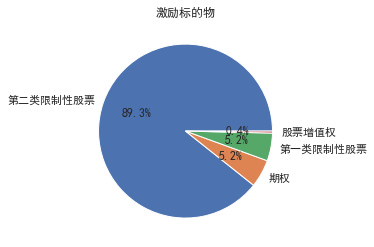

In [473]:
## 20210101-20220815
kcb21 = Description(data_=data[(data['预案公告日']>='20210101')&( data['预案公告日']<'20220815')
                               &(data['板块']=='科创板')])
# des22.execution()
kcb21.underlying()

In [221]:
data['方案进度'].unique()

array(['实施', '停止实施', '董事会预案', '股东大会通过', '股东大会未通过', '国资委批准'], dtype=object)

## 超额收益
预案公告日后T+120日的收益率与中证全指进行比较   
规则：预案公告日下一个交易日开盘价买入（暂时忽略开盘涨停的问题）

In [261]:
"""
absolute return
"""
time_window = 120
abs_col = ['date', 'code','status','open_ret', 'd1_fall'] + ['equity'+str(x+1) for x in range(time_window)] + ['index' + str(x+1) for x in range(time_window)]
abs_ret = pd.DataFrame(columns=abs_col)
"""
CSI：中证全指
"""
csi_data = pd.read_csv('000985.csv')
csi_data.trade_date = pd.to_datetime(csi_data.trade_date.astype(str))
csi_data.sort_values('trade_date', ascending=True, inplace=True)
for i in tqdm(range(len(data))):
    temp_series = data.iloc[i,:]
    if temp_series['预案公告日'] >= pd.to_datetime('20220815'): continue
    stock_data = pd.read_csv('stock_data/' + temp_series['代码'] + '.csv')
    original_length = len(stock_data)
    stock_data.trade_date = pd.to_datetime(stock_data.trade_date.astype(str))
    stock_data.sort_values('trade_date', ascending=True, inplace=True)
    stock_data['pre_date'] = stock_data['trade_date'].shift()
    # temp_data['pre_close'] = temp_data['close'].shift(1)
    stock_data = stock_data[stock_data['trade_date'] >= temp_series['预案公告日']]
    ## 当日不可交易的情况
    if (stock_data.trade_date.iloc[0]-temp_series['预案公告日']).days>10: continue
    if (stock_data.trade_date.iloc[0]-stock_data.pre_date.iloc[0]).days>10: continue
    
    if original_length - len(stock_data) <= 120: continue
    stock_data['cost'] = stock_data['open'].iloc[0]
    stock_data['ret'] = stock_data['close'] / stock_data['cost'] - 1
    
    ## 
    open_ret = stock_data['open'].iloc[0]/stock_data['pre_close'].iloc[0] - 1
    d1_fall = stock_data['close'].iloc[0] / stock_data['open'].iloc[0] - 1

    csi = csi_data.copy()
    csi = csi[csi.trade_date>=temp_series['预案公告日']]
    csi['cost'] = csi['open'].iloc[0]
    csi['ret'] = csi['close']/csi['cost']-1

    new_row = [temp_series['预案公告日'], temp_series['代码'], temp_series['方案进度'],
               open_ret, d1_fall] + list(stock_data.ret.iloc[0:time_window]) +\
              list(csi.ret.iloc[0:time_window])

    abs_ret.loc[i] = new_row

100%|███████████████████████████████████████| 5018/5018 [02:16<00:00, 36.81it/s]


In [280]:
abs_ret['sector'] = list(data.drop_duplicates('代码').set_index('代码').loc[abs_ret.code, '板块'])

In [285]:
abs_ret.open_ret.abs()

23      0.015414
24      0.062069
25      0.004494
26      0.025024
27      0.006772
          ...   
4622    0.022686
4624    0.041244
4625    0.004336
4626    0.001215
4627    0.000000
Name: open_ret, Length: 3993, dtype: float64

In [299]:
filtered_ret = abs_ret[~((abs_ret.open_ret.abs()>=0.198)&(abs_ret['sector'].isin(['科创板','创业板'])))]
filtered_ret = abs_ret[((abs_ret.open_ret.abs()<=0.097)&(~abs_ret['sector'].isin(['科创板','创业板'])))]

In [300]:
# temp_series = data.iloc[i,:]
# # if temp_series['预案公告日'] >= pd.to_datetime('20220815'): continue
# stock_data = pd.read_csv('stock_data/' + temp_series['代码'] + '.csv')
# original_length = len(stock_data)
# stock_data.trade_date = pd.to_datetime(stock_data.trade_date.astype(str))
# stock_data.sort_values('trade_date', ascending=True, inplace=True)
# # temp_data['pre_close'] = temp_data['close'].shift(1)
# stock_data = stock_data[stock_data['trade_date'] >= temp_series['预案公告日']]
# # if original_length - len(stock_data) <= 120: continue
# stock_data['cost'] = stock_data['open'].iloc[0]
# stock_data['ret'] = stock_data['close'] / stock_data['cost'] - 1

# ## 
# open_ret = stock_data['open'].iloc[0]/stock_data['pre_close'].iloc[0] - 1
# d1_fall = stock_data['close'].iloc[0] / stock_data['open'].iloc[0] - 1

# csi = csi_data.copy()
# csi = csi[csi.trade_date>=temp_series['预案公告日']]
# csi['cost'] = csi['open'].iloc[0]
# csi['ret'] = csi['close']/csi['cost']-1

# new_row = [temp_series['预案公告日'], temp_series['代码'], temp_series['方案进度'],
#            open_ret, d1_fall] + list(stock_data.ret.iloc[0:time_window]) +\
#           list(csi.ret.iloc[0:time_window])

# abs_ret.loc[i] = new_row

In [313]:
len(abs_ret)

3993

In [302]:
filtered_ret.sort_values('open_ret', ascending=False).head(20)

,date,code,status,open_ret,d1_fall,equity1,equity2,equity3,equity4,equity5,...,index112,index113,index114,index115,index116,index117,index118,index119,index120,sector
1955,2018-07-09,002583.SZ,实施,0.096732,-0.023838,-0.023838,-0.009535,-0.022646,0.051251,0.091776,...,-0.114204,-0.115888,-0.124565,-0.119340,-0.127010,-0.130490,-0.138336,-0.134726,-0.143040,中小板
4114,2022-01-21,603337.SH,实施,0.096003,0.003759,0.003759,0.034962,0.015414,0.000000,0.081955,...,-0.099631,-0.094915,-0.091281,-0.105641,-0.092207,-0.091567,-0.084808,-0.092824,-0.094912,主板
4115,2022-01-21,603337.SH,实施,0.096003,0.003759,0.003759,0.034962,0.015414,0.000000,0.081955,...,-0.099631,-0.094915,-0.091281,-0.105641,-0.092207,-0.091567,-0.084808,-0.092824,-0.094912,主板
1538,2017-09-02,600318.SH,停止实施,0.092105,-0.052711,-0.052711,0.042169,0.070783,0.024849,0.020331,...,-0.074615,-0.056225,-0.052666,-0.037084,-0.043984,-0.046763,-0.037998,-0.044175,-0.042173,主板
2797,2020-06-24,603337.SH,实施,0.089267,0.009756,0.009756,0.060976,0.068293,0.102439,0.058537,...,0.163562,0.145402,0.145769,0.131218,0.141781,0.144347,0.141909,0.154808,0.150989,主板
4250,2022-03-22,603399.SH,实施,0.088296,0.010849,0.010849,0.111792,0.178302,0.296226,0.166509,...,-0.040013,-0.037873,-0.037032,-0.023979,-0.021293,-0.027497,-0.020025,-0.018174,-0.028388,主板
4251,2022-03-22,603399.SH,实施,0.088296,0.010849,0.010849,0.111792,0.178302,0.296226,0.166509,...,-0.040013,-0.037873,-0.037032,-0.023979,-0.021293,-0.027497,-0.020025,-0.018174,-0.028388,主板
835,2015-08-05,603002.SH,实施,0.088203,-0.051672,-0.051672,-0.078014,0.014184,0.101317,0.108409,...,-0.157787,-0.167015,-0.197757,-0.186780,-0.179550,-0.235805,-0.242291,-0.270655,-0.244886,主板
2675,2020-03-20,002727.SZ,实施,0.087756,0.011111,0.011111,0.094203,0.136715,0.164251,0.176329,...,0.310010,0.311942,0.301896,0.293218,0.267424,0.275195,0.242097,0.224359,0.239311,中小板
663,2014-09-16,600523.SH,实施,0.086652,-0.012382,-0.012382,-0.077266,-0.076275,-0.081724,-0.128281,...,0.340675,0.361232,0.367040,0.367360,0.378026,0.392522,0.431173,0.450990,0.481554,主板


In [266]:
abs_ret.sort_values('equity120',ascending=False)[['date','code', 'equity120']]

,date,code,equity120
3899,2021-10-29,002432.SZ,11.564103
665,2014-09-20,300208.SZ,5.360436
2576,2019-12-16,300677.SZ,5.270389
664,2014-09-18,300059.SZ,5.268657
3480,2021-04-27,300432.SZ,4.513228
...,...,...,...
1171,2016-10-21,002787.SZ,-0.720411
125,2011-07-21,002042.SZ,-0.729479
785,2015-05-21,300075.SZ,-0.755167
1164,2016-10-15,603636.SH,-0.761004


#### 未~~剔除上市不满六个月~~以及~~第一个交易日无法交易的~~样本

In [314]:
abs_ret.head()

,date,code,status,open_ret,d1_fall,equity1,equity2,equity3,equity4,equity5,...,index112,index113,index114,index115,index116,index117,index118,index119,index120,sector
23,2010-07-13,002146.SZ,实施,0.015414,-0.011385,-0.011385,-0.010436,-0.010436,0.001898,0.036053,...,0.213303,0.189391,0.201681,0.204192,0.230103,0.251445,0.249390,0.243224,0.241920,中小板
24,2010-07-28,600496.SH,实施,0.062069,-0.016698,-0.016698,-0.009276,-0.025974,0.012059,0.008349,...,0.153608,0.153107,0.132812,0.087949,0.090535,0.115798,0.078384,0.089825,0.073340,主板
25,2010-07-29,002139.SZ,停止实施,0.004494,0.001119,0.001119,-0.007271,0.003915,-0.027405,-0.024049,...,0.124624,0.104830,0.061076,0.063597,0.088236,0.051746,0.062905,0.046827,0.036947,中小板
26,2010-07-29,600067.SH,实施,0.025024,0.026291,0.026291,0.030986,0.067606,0.023474,0.015962,...,0.124624,0.104830,0.061076,0.063597,0.088236,0.051746,0.062905,0.046827,0.036947,主板
27,2010-08-11,000826.SZ,实施,-0.006772,0.061818,0.061818,0.043182,0.039091,0.059545,0.074091,...,0.056120,0.073358,0.080129,0.094471,0.095958,0.086638,0.112099,0.120530,0.149150,主板


In [315]:
np.mean(abs_ret.d1_fall)

0.004404399766255416

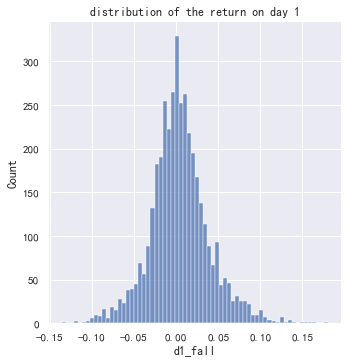

In [438]:
sns.displot(abs_ret.d1_fall)
plt.title('distribution of the return on day 1')
plt.show()

## 刨除停止实施样本后的表现

In [469]:
class day120test:
    def __init__(self, data=abs_ret, time_window=120):
        self.time_window = time_window
        self.data = data
        self.all_ret = self.data[~self.data.status.isin(['停止实施', '延期实施','未通过', '股东大会未通过']) ]
        self.equity_part = self.all_ret[['equity' + str(x+1) for x in range(time_window)]]
        self.index_part = self.all_ret[['index' + str(x+1) for x in range(time_window)]]

        self.excess_ret = pd.DataFrame(self.equity_part.values - self.index_part.values, index=self.all_ret.index, 
                                  columns=['T+' + str(x+1) for x in range(time_window)])
        self.calculation()
        self.stats()
    def calculation(self):
        ## 120 day return dataframe
        self.t_df = pd.DataFrame(index=np.arange(1,121), columns=['excess_mean', 'excess_median', 'equity', 'index'])
        self.t_df['excess_mean'] = list(self.excess_ret.mean())
        # t_df['csi'] = list(index_ret)
        self.t_df['excess_median'] = list(self.excess_ret.median())
        self.t_df['equity'] = list(self.equity_part.mean())
        self.t_df['index'] = list(self.index_part.mean())
        
    def stats(self):
        win_rate = ((self.equity_part.values > self.index_part.values).astype(int).mean(axis=0))
        max_value = self.excess_ret.max(axis=0)
        min_value = self.excess_ret.min(axis=0)
        self.stats_df = pd.DataFrame(index=['mean', 'median', 'max', 'min', 'win_rate'], 
                        columns=["T+"+str(x+1) for x in range(self.time_window)])
        self.stats_df.loc['mean'] = list(self.excess_ret.mean())
        self.stats_df.loc['median'] = list(self.excess_ret.median())
        self.stats_df.loc['max'] = list(self.excess_ret.max(axis=0))
        self.stats_df.loc['min'] = list(self.excess_ret.min(axis=0))
        self.stats_df.loc['win_rate'] = list(win_rate)
    def show_stats(self):
        print(self.stats_df[['T+'+str(x) for x in [20,40,60,80,100,120]]])
        
    def plot_fig(self):
        self.t_df[['excess_mean', 'equity', 'index']].plot()
        plt.show()

## 超额收益图以及相关统计量

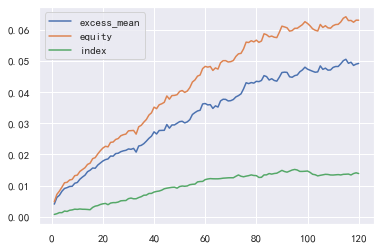

              T+20      T+40       T+60       T+80      T+100      T+120
mean      0.017892  0.027243   0.036332   0.043459   0.047359   0.049195
median    0.004354 -0.001383  -0.005203  -0.005341  -0.014763  -0.028038
max       1.705411  4.935535  10.942795  10.442498  10.125807  11.796835
min      -0.725505 -0.734479  -0.740852  -1.080329    -1.1303   -1.29755
win_rate   0.51989  0.497238   0.487569   0.489227   0.473481   0.458011


In [470]:
test = day120test(data=abs_ret)
test.plot_fig()
test.show_stats()

In [310]:
test.stats_df[['T+'+str(x) for x in [20,40,60,80,100,120]]]

,T+20,T+40,T+60,T+80,T+100,T+120
mean,0.017892,0.027243,0.036332,0.043459,0.047359,0.049195
median,0.004354,-0.001383,-0.005203,-0.005341,-0.014763,-0.028038
max,1.705411,4.935535,10.942795,10.442498,10.125807,11.796835
min,-0.725505,-0.734479,-0.740852,-1.080329,-1.1303,-1.29755
win_rate,0.51989,0.497238,0.487569,0.489227,0.473481,0.458011


In [484]:
stats_df[['T+'+str(x) for x in [20,40,60,80,100,120]]].transpose().to_clipboard()

In [269]:
all_ret = abs_ret[~abs_ret.status.isin(['停止实施', '延期实施','未通过', '股东大会未通过']) ]
equity_part = all_ret[['equity' + str(x+1) for x in range(time_window)]]
index_part = all_ret[['index' + str(x+1) for x in range(time_window)]]

excess_ret = pd.DataFrame(equity_part.values - index_part.values, index=all_ret.index, 
                          columns=['T+' + str(x+1) for x in range(time_window)])
# equity_median = excess_ret[['equity' + str(x+1) for x in range(time_window)]].median()
# index_median = excess_ret[['index' + str(x+1) for x in range(time_window)]].median()


In [270]:
## 120 day return dataframe
t_df = pd.DataFrame(index=np.arange(1,121), columns=['excess_mean', 'excess_median', 'equity', 'index'])
t_df['excess_mean'] = list(excess_ret.mean())
# t_df['csi'] = list(index_ret)
t_df['excess_median'] = list(excess_ret.median())
t_df['equity'] = list(equity_part.mean())
t_df['index'] = list(index_part.mean())

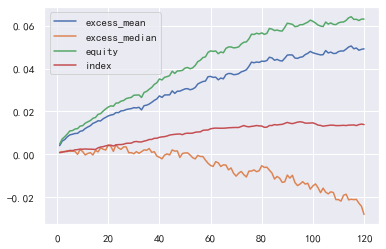

In [437]:
t_df.plot()
plt.show()

## 逼近拟合指数

In [526]:
sip19 = data[(data['预案公告日']>='2018-07-01')&data['方案进度'].isin(['实施', '董事会预案', '股东大会通过', '国资委批准'])]
szzs = pd.read_excel('上证指数.xlsx',index_col=0).dropna()
stock_list = pd.DataFrame(index=pd.to_datetime(szzs['日期']), columns=['list'])

In [527]:
for date in stock_list.index:
    candidates = sip19[(sip19['预案公告日'] <= date)]
    stock_list.loc[date, 'list'] = list(candidates['代码'])

In [528]:
stock_list.head()

,list
日期,
2019-05-31,"[002824.SZ, 300142.SZ, 002640.SZ, 600933.SH, 0..."
2019-06-03,"[002824.SZ, 300142.SZ, 002640.SZ, 600933.SH, 0..."
2019-06-04,"[002824.SZ, 300142.SZ, 002640.SZ, 600933.SH, 0..."
2019-06-05,"[002824.SZ, 300142.SZ, 002640.SZ, 600933.SH, 0..."
2019-06-06,"[002824.SZ, 300142.SZ, 002640.SZ, 600933.SH, 0..."


#### 条件：按照最新业绩报

In [529]:
predicted_rate = pd.read_csv("预计增速.csv", index_col=0)
predicted_rate['预告日期'] = pd.to_datetime(predicted_rate['预告日期'])

In [530]:
for date in stock_list.index:
    report = predicted_rate[((date-predicted_rate['预告日期']).dt.days<=120) & (predicted_rate['预告日期']<date)]
    stock_list.loc[date, 'list'] = set(list(stock_list.loc[date][0])).intersection(set(list(report['证券代码'])))

#### 条件：按照评级家数

In [531]:
instnum = pd.read_excel("评级家数.xlsx", index_col=0).drop('证券简称',axis=1).transpose()
instnum.index = pd.to_datetime(instnum.index.astype(str))

In [532]:
for date in stock_list.index:
    num = instnum.loc[instnum.index<date,:].iloc[-1,:]
    num_3 = num[num>=3]
    stock_list.loc[date, 'list'] = set(list(stock_list.loc[date][0])).intersection(set(list(num_3.index)))

In [525]:
num_3.index

Index(['603609.SH', '002398.SZ', '002399.SZ', '002400.SZ', '002409.SZ',
       '002410.SZ', '002411.SZ', '002413.SZ', '002415.SZ', '002572.SZ',
       ...
       '002456.SZ', '601717.SH', '002440.SZ', '300094.SZ', '002607.SZ',
       '002608.SZ', '601636.SH', '002594.SZ', '601058.SH', '600023.SH'],
      dtype='object', name='证券代码', length=1236)

#### 组合收益

In [533]:
equity_return = pd.read_csv("panel_return.csv")
equity_return['日期'] = pd.to_datetime(equity_return['日期'])
equity_return.set_index('日期', inplace=True)

In [534]:
indice = pd.DataFrame(index=equity_return.index, columns=['r','nv'])

In [535]:
for date in indice.index:
    mean_r = equity_return.loc[date, stock_list.loc[date, 'list']].mean()
    indice.loc[date, 'r'] = mean_r

In [536]:
indice['nv'] = (1+indice['r']).cumprod()

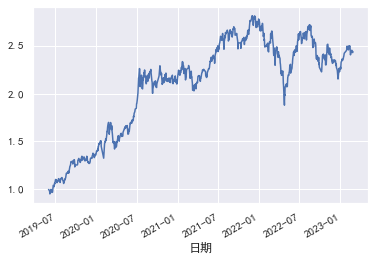

In [537]:
indice['nv'].plot()
plt.show()

In [538]:
class indice_approximation:
    def __init__(self, data=data):
        self.sip19 = data[(data['预案公告日']>='2018-07-01')&data['方案进度'].isin(
            ['实施', '董事会预案', '股东大会通过', '国资委批准'])]
        self.szzs = pd.read_excel('上证指数.xlsx',index_col=0).dropna()
        self.stock_list = pd.DataFrame(index=pd.to_datetime(self.szzs['日期']), columns=['list'])
        
        ##
        self.equity_return = pd.read_csv("panel_return.csv")
        self.equity_return['日期'] = pd.to_datetime(self.equity_return['日期'])
        self.equity_return.set_index('日期', inplace=True)
    def incentive_list(self, enhanced=True):
        for date in self.stock_list.index:
            if enhanced:
                self.candidates = self.sip19[(self.sip19['预案公告日'] <= date)&(
                    (date-self.sip19['预案公告日']).dt.days <=120)]
            else:
                self.candidates = self.sip19[(self.sip19['预案公告日'] <= date)]
                
            self.stock_list.loc[date, 'list'] = list(self.candidates['代码'])
    def report_filter(self):
        self.predicted_rate = pd.read_csv("预计增速.csv", index_col=0)
        self.predicted_rate['预告日期'] = pd.to_datetime(self.predicted_rate['预告日期'])
        for date in self.stock_list.index:
            report = self.predicted_rate[((date-self.predicted_rate['预告日期']).dt.days<=120) & 
                                         (self.predicted_rate['预告日期']<date)]
            self.stock_list.loc[date, 'list'] = set(list(self.stock_list.loc[date][0])).intersection(set(list(report['证券代码'])))
    
    def instnum_filter(self):
        self.instnum = pd.read_excel("评级家数.xlsx", index_col=0).drop('证券简称',axis=1).transpose()
        self.instnum.index = pd.to_datetime(self.instnum.index.astype(str))
        
        for date in self.stock_list.index:
            num = self.instnum.loc[self.instnum.index<date,:].iloc[-1,:]
            num_3 = num[num>=3]
            self.stock_list.loc[date, 'list'] = set(list(
                self.stock_list.loc[date][0])).intersection(set(list(num_3.index)))

    
    def indice_output(self):
        self.indice = pd.DataFrame(index=self.equity_return.index, columns=['r','nv'])
        for date in indice.index:
            mean_r = equity_return.loc[date, self.stock_list.loc[date, 'list']].mean()
            self.indice.loc[date, 'r'] = mean_r
        self.indice['nv'] = (1+self.indice['r']).cumprod()
        self.indice['nv'].plot()
        plt.title("股权激励指数近似")
        plt.show()
        
        self.ann_ret = np.mean(self.indice['r']) * 252
        self.ann_sharpe = np.mean(self.indice['r'])/np.std(self.indice['r']) * np.sqrt(252)
        print("年化收益为{:.3f}".format(self.ann_ret))
        print("Sharpe为{:.2f}".format(self.ann_sharpe))
        

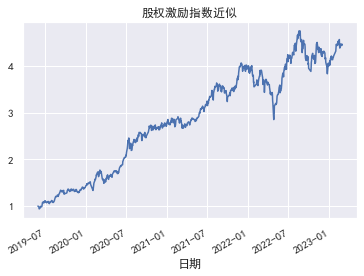

年化收益为0.448
Sharpe为1.72


In [566]:
enhanced_index = indice_approximation()
enhanced_index.incentive_list()
enhanced_index.report_filter()
# enhanced_index.instnum_filter()
enhanced_index.indice_output()

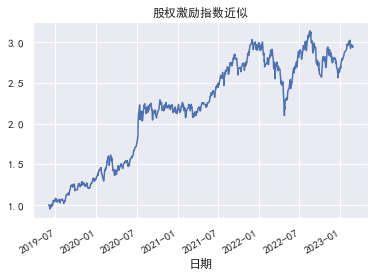

年化收益为0.331
Sharpe为1.34


In [562]:
original_index = indice_approximation()
original_index.incentive_list(enhanced=False)
original_index.report_filter()
# original_index.instnum_filter()
original_index.indice_output()

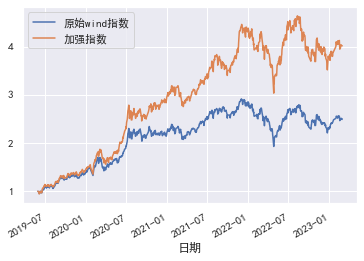

In [551]:
original_index.indice['nv'].plot()
enhanced_index.indice['nv'].plot()
plt.legend(['原始wind指数','加强指数'])

plt.show()

In [557]:
wind_index = pd.read_excel('股权激励指数.xlsx', index_col='日期')
wind_index['nv'] = wind_index['收盘价']/wind_index['收盘价'].iloc[0]

In [559]:
mutual_date = set(list(wind_index.index)).intersection(list(original_index.indice.index))

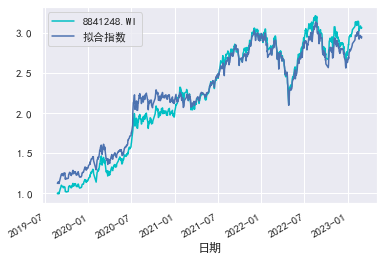

In [576]:
# enhanced_index.indice.loc[mutual_date,'nv'].plot()
wind_index.loc[mutual_date, 'nv'].plot(color='#00bfc4')
original_index.indice.loc[mutual_date,'nv'].plot()
plt.legend(['8841248.WI', '拟合指数'])
plt.show()

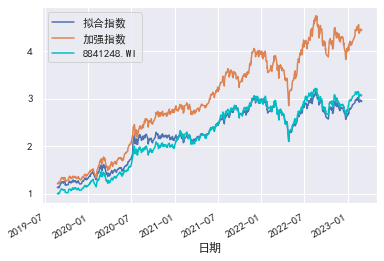

In [575]:
original_index.indice.loc[mutual_date,'nv'].plot()
enhanced_index.indice.loc[mutual_date,'nv'].plot()
wind_index.loc[mutual_date, 'nv'].plot(color='#00bfc4')
plt.legend(['拟合指数', '加强指数','8841248.WI'])
plt.show()